In [16]:
import torch
import matplotlib.pyplot as plt

from m2_utilities.load_data import load_trajectories
from m2_utilities.preprocessor import stringify, destringify, trim_sequence, validate_sequence
from m2_utilities.qwen import load_qwen

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading the Model and Data

In [17]:
# Model
model, tokenizer = load_qwen()

In [18]:
# Data
unscaled_trajectories = load_trajectories("data/lotka_volterra_data.h5")

# Scaling
ALPHA = 1.5
trajectories = unscaled_trajectories / ALPHA

### Testing an Input

In [19]:
# Extract a single system trajectory
system_id = 0
traj = trajectories[system_id]

# First N points
N = 55
traj_section = traj[:N]

# Stringify
DECIMALS = 3
text = stringify(traj_section, DECIMALS)

# Tokenize
input_ids = tokenizer(text, return_tensors="pt", add_special_tokens=False)["input_ids"][0]

# Reshape for input into the network
input_ids = input_ids.reshape(1, -1)

In [20]:
# Performing inference
output_ids = model.generate(input_ids, max_new_tokens=250, do_sample=False)

In [21]:
# Reshape and trim
output_ids = output_ids.reshape(-1)
output_ids = trim_sequence(output_ids)
validate_sequence(output_ids)

# Decode to string
output_text = tokenizer.decode(output_ids, return_tensors="pt", add_special_tokens=False)

# Destringify
predictions = destringify(output_text)

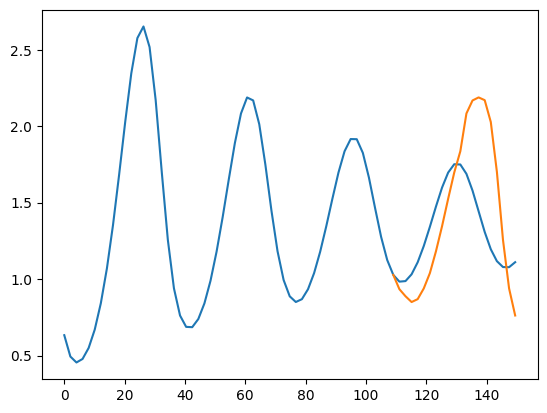

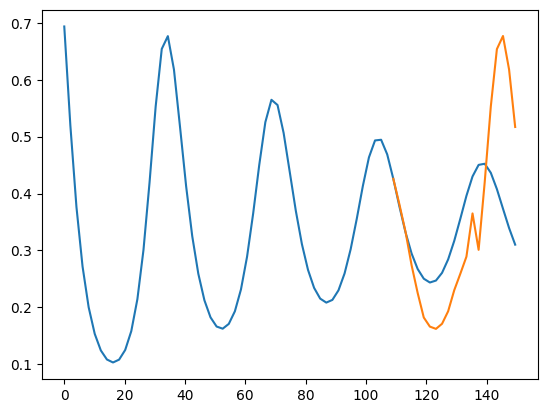

In [22]:
times = torch.linspace(0, 200, 100)
times = times[:len(predictions)]
times_predicted = times[len(traj_section)-1:]


pred_true = traj[:len(predictions), 0]
prey_true = traj[:len(predictions), 1]

pred_predicted = predictions[len(traj_section)-1:, 0]
prey_predicted = predictions[len(traj_section)-1:, 1]

plt.plot(times, pred_true)
plt.plot(times_predicted, pred_predicted)
plt.show()

plt.plot(times, prey_true)
plt.plot(times_predicted, prey_predicted)
plt.show()